<a href="https://colab.research.google.com/github/velpulakaran/reinforcement-learning/blob/main/ASS_01ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Define grid dimensions
grid_size = 5
grid_shape = (grid_size, grid_size)

# Define rewards
step_reward = -1
goal_reward = 10
pit_reward = -10

# Define special states
start_state = (0, 0)
goal_state = (4, 4)
pit_state = (2, 2)

# Create a grid to store rewards (for visualization purposes, not strictly needed for value iteration)
rewards = np.full(grid_shape, step_reward)
rewards[goal_state] = goal_reward
rewards[pit_state] = pit_reward

print("GridWorld Environment Defined:")
print("Grid Size:", grid_shape)
print("Start State:", start_state)
print("Goal State:", goal_state, "(Reward:", goal_reward, ")")
print("Pit State:", pit_state, "(Reward:", pit_reward, ")")
print("Step Reward:", step_reward)
print("\nReward Grid (for reference):")
print(rewards)

GridWorld Environment Defined:
Grid Size: (5, 5)
Start State: (0, 0)
Goal State: (4, 4) (Reward: 10 )
Pit State: (2, 2) (Reward: -10 )
Step Reward: -1

Reward Grid (for reference):
[[ -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1]
 [ -1  -1 -10  -1  -1]
 [ -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  10]]


In [2]:
# Define the fixed policy: always try to move Right, otherwise Down
def fixed_policy(state, grid_size):
    row, col = state
    # Try to move right
    if col + 1 < grid_size:
        return (row, col + 1)
    # Otherwise, move down
    elif row + 1 < grid_size:
        return (row + 1, col)
    # If at the edge and cannot move right or down, stay in the current state
    else:
        return state

print("Fixed policy defined: Move Right if possible, otherwise Down.")

# Example of policy in action:
# From (0,0)
next_state_from_start = fixed_policy(start_state, grid_size)
print(f"From {start_state}, the policy moves to {next_state_from_start}")

# From (0,4) (right edge)
next_state_from_edge = fixed_policy((0, 4), grid_size)
print(f"From (0, 4), the policy moves to {next_state_from_edge}")

# From (4,4) (goal state)
next_state_from_goal = fixed_policy(goal_state, grid_size)
print(f"From {goal_state}, the policy moves to {next_state_from_goal}")

Fixed policy defined: Move Right if possible, otherwise Down.
From (0, 0), the policy moves to (0, 1)
From (0, 4), the policy moves to (1, 4)
From (4, 4), the policy moves to (4, 4)


In [3]:
# Define the discount factor
gamma = 0.9

# Initialize the value function V(s) to zeros for all states
V = np.zeros(grid_shape)

# Implement Value Function Calculation (Iterative Policy Evaluation)
# We will iterate until the value function converges

# A small threshold to check for convergence
theta = 1e-6
delta = float('inf')

while delta > theta:
    delta = 0
    # Iterate through each state in the grid
    for r in range(grid_size):
        for c in range(grid_size):
            current_state = (r, c)
            # Store the old value for convergence check
            old_v = V[current_state]

            # If it's a terminal state (goal or pit), the value is the reward
            if current_state == goal_state or current_state == pit_state:
                V[current_state] = rewards[current_state]
            else:
                # Determine the next state based on the fixed policy
                next_state = fixed_policy(current_state, grid_size)

                # Calculate the value of the current state using the Bellman Expectation Equation
                # For a deterministic policy, pi(a|s) is 1 for the action given by the policy and 0 otherwise.
                # P(s'|s,a) is 1 for the next state determined by the deterministic environment and 0 otherwise.
                # So, the equation simplifies to V(s) = R(s, a, s') + gamma * V(s')
                reward = rewards[next_state] # Reward received upon transitioning to the next state
                V[current_state] = reward + gamma * V[next_state]

            # Update the maximum change
            delta = max(delta, abs(old_v - V[current_state]))

print("Value function computation complete.")

Value function computation complete.


In [4]:
print("Computed Value Function V(s):")
# Display the value function V with appropriate formatting
# We can iterate through the grid and print the value for each state
for r in range(grid_size):
    row_values = []
    for c in range(grid_size):
        row_values.append(f"{V[r, c]:.2f}") # Format to 2 decimal places
    print(" ".join(row_values))

Computed Value Function V(s):
3.87 5.41 7.12 9.03 11.14
5.41 7.12 9.03 11.14 13.49
-18.10 -19.00 -10.00 13.49 16.10
9.03 11.14 13.49 16.10 19.00
11.14 13.49 16.10 19.00 10.00


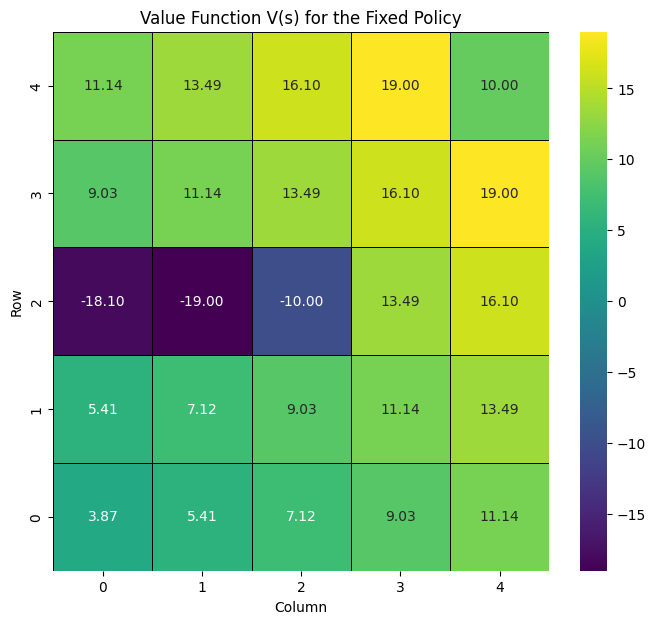

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for visualization
plt.figure(figsize=(8, 7))
sns.heatmap(V, annot=True, cmap="viridis", fmt=".2f", linewidths=.5, linecolor='black')

# Add labels and title
plt.title("Value Function V(s) for the Fixed Policy")
plt.xlabel("Column")
plt.ylabel("Row")

# Invert the y-axis to match gridworld conventions (row 0 at the top)
plt.gca().invert_yaxis()

# Display the plot
plt.show()